主成分　＝　共分散行列の固有ベクトル

numpyでのnp.linalg.eigでは、固有ベクトルは　列ベクトル

PCA による .get_covariance()　では、固有ベクトルは　行ベクトル

共分散行列　x　固有ベクトル　＝　固有値　x　固有ベクトル

固有ベクトル行列 x 特定データ　＝　主成分ベクトルが新しい軸になるように回転されたプロジェクションとなる


固有ベクトル行列　<=== データサンプル数の制約を受ける　

(n=10,f=50) -> 10x50 の固有ベクトル行列 (not 50x50)   

(n=100,f=50) -> 50x50 の固有ベクトル行列

参考HP
http://qiita.com/supersaiakujin/items/138c0d8e6511735f1f45

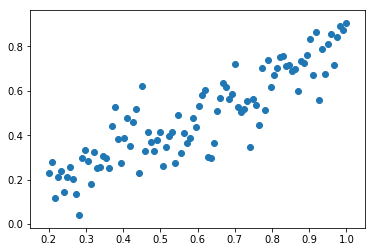

In [69]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.2, 1, 100)
y = 0.8*x + np.random.randn(100)*0.1
X = np.vstack([x,y]).T
np.random.shuffle(X)

plt.scatter(x,y)


In [134]:
pca = PCA(n_components=2)
pca.fit(X)
PCA(copy = True, n_components=2, whiten=False)

print('components:')
print(pca.components_)
print('mean:')
print(pca.mean_)
print('covariance:')
print(pca.get_covariance())


components:
[[ 0.75325958  0.65772335]
 [-0.65772335  0.75325958]]
mean:
[ 0.6         0.48635629]
covariance:
[[ 0.05441077  0.04293564]
 [ 0.04293564  0.0427287 ]]


In [135]:
mn = np.mean(X, axis=0)
d = X - mn
cv = np.cov(d[:,0],d[:,1],bias=1)

print('mean:')
print(mn)
print('covariance:')
print(cv,'\n')

Evalue,Evector = np.linalg.eig(cv)
print('eigenvalue')
print(Evalue)
print('eigenvector')
print(Evector)

mean:
[ 0.6         0.48635629]
covariance:
[[ 0.05441077  0.04293564]
 [ 0.04293564  0.0427287 ]] 

eigenvalue
[ 0.09190087  0.0052386 ]
eigenvector
[[ 0.75325958 -0.65772335]
 [ 0.65772335  0.75325958]]


In [136]:
print('共分散行列 x 固有ベクトル')
print(cv.dot(Evector[:,0]).reshape(2,1))
print(pca.get_covariance().dot(Evector))
print(cv.dot(Evector))
print(pca.get_covariance().dot(pca.components_.T))   # <=== .T あり
#print(pca.get_covariance().dot(pca.components_))     # <=== .T なし　（計算間違いとなる）

print('固有値 x 固有ベクトル')
print(Evalue*Evector)
print(Evalue*(pca.components_).T)

共分散行列 x 固有ベクトル
[[ 0.06922521]
 [ 0.06044535]]
[[ 0.06922521 -0.00344555]
 [ 0.06044535  0.00394603]]
[[ 0.06922521 -0.00344555]
 [ 0.06044535  0.00394603]]
[[ 0.06922521 -0.00344555]
 [ 0.06044535  0.00394603]]
固有値 x 固有ベクトル
[[ 0.06922521 -0.00344555]
 [ 0.06044535  0.00394603]]
[[ 0.06922521 -0.00344555]
 [ 0.06044535  0.00394603]]


(100, 2)


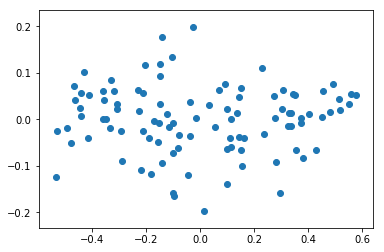

In [138]:
# Projection: データと主成分ベクトルの内積を計算
Xd = pca.transform(X)
print(Xd.shape)
plt.scatter(Xd[:,0],Xd[:,1])


In [139]:
Xe = pca.inverse_transform(Xd)


In [183]:
np.random.seed(0)

x=[]
for i in range(5*5*3*100):
    x.append(np.random.randint(10))

print(len(x))
x=np.array(x).reshape(-1,5,5,3)
print(len(x))
print(x.shape)
print(x[0].shape)
print(x[0][0].shape)
print(x[0][0][0].shape)
print(x.shape[0])
print(x.shape[1])
print(x.shape[2])
print(x.shape[3])
print(x)

x1d = x.reshape(-1,5*5*3)
x1d.shape

7500
100
(100, 5, 5, 3)
(5, 5, 3)
(5, 3)
(3,)
100
5
5
3
[[[[5 0 3]
   [3 7 9]
   [3 5 2]
   [4 7 6]
   [8 8 1]]

  [[6 7 7]
   [8 1 5]
   [9 8 9]
   [4 3 0]
   [3 5 0]]

  [[2 3 8]
   [1 3 3]
   [3 7 0]
   [1 9 9]
   [0 4 7]]

  [[3 2 7]
   [2 0 0]
   [4 5 5]
   [6 8 4]
   [1 4 9]]

  [[8 1 1]
   [7 9 9]
   [3 6 7]
   [2 0 3]
   [5 9 4]]]


 [[[4 6 4]
   [4 3 4]
   [4 8 4]
   [3 7 5]
   [5 0 1]]

  [[5 9 3]
   [0 5 0]
   [1 2 4]
   [2 0 3]
   [2 0 7]]

  [[5 9 0]
   [2 7 2]
   [9 2 3]
   [3 2 3]
   [4 1 2]]

  [[9 1 4]
   [6 8 2]
   [3 0 0]
   [6 0 6]
   [3 3 8]]

  [[8 8 2]
   [3 2 0]
   [8 8 3]
   [8 2 8]
   [4 3 0]]]


 [[[4 3 6]
   [9 8 0]
   [8 5 9]
   [0 9 6]
   [5 3 1]]

  [[8 0 4]
   [9 6 5]
   [7 8 8]
   [9 2 8]
   [6 6 9]]

  [[1 6 8]
   [8 3 2]
   [3 6 3]
   [6 5 7]
   [0 8 4]]

  [[6 5 8]
   [2 3 9]
   [7 5 3]
   [4 5 3]
   [3 7 9]]

  [[9 9 7]
   [3 2 3]
   [9 7 7]
   [5 1 2]
   [2 8 1]]]


 ..., 
 [[[0 2 8]
   [5 1 6]
   [8 1 3]
   [7 0 2]
   [0 5 4]]

  [[5 6 7]
   [0 7 

(100, 75)

In [188]:
pca1 = PCA(n_components=75)
pca1.fit(x1d)

print(pca1.components_.shape)
print(pca1.mean_.shape)
print(pca1.get_covariance().shape)

print('components:')
print(pca1.components_)
print('mean:')
print(pca1.mean_)
print('covariance:')
print(pca1.get_covariance())

(75, 75)
(75,)
(75, 75)
components:
[[ 0.01601784 -0.03966885  0.03379886 ..., -0.02898374  0.07218411
  -0.10357482]
 [ 0.14461823  0.03944473 -0.12221856 ..., -0.21614031 -0.16826111
   0.03986547]
 [ 0.09857129 -0.06091196 -0.00886725 ..., -0.1017779  -0.19722168
  -0.08059394]
 ..., 
 [-0.06953796 -0.00693343 -0.03000834 ...,  0.01331597 -0.07215541
   0.26114141]
 [-0.0385258  -0.02165967 -0.01722034 ..., -0.17361282 -0.24490674
   0.0970212 ]
 [-0.1339058  -0.14758212 -0.0336471  ..., -0.05590709 -0.14187128
  -0.09961934]]
mean:
[ 4.1   4.53  4.63  4.51  4.3   4.61  3.97  4.63  4.32  4.21  3.93  4.66
  4.62  4.76  4.41  4.26  4.42  4.06  4.65  4.55  4.64  4.37  4.44  4.67
  4.87  4.34  4.22  4.37  4.76  4.27  3.69  4.61  4.66  4.17  4.38  3.89
  4.3   4.69  4.55  4.8   4.72  4.59  4.66  4.16  4.17  4.62  4.25  5.01
  4.81  4.79  4.37  4.85  4.36  4.81  4.49  4.12  4.74  4.84  4.5   4.73
  4.65  4.72  4.4   4.48  3.92  4.49  4.73  4.84  4.62  4.21  4.24  4.32
  4.68  4.66  4.69]
